<a href="https://colab.research.google.com/github/Vothuw/homeworkAl/blob/main/BT4_GRAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.4 MB/s eta 0:00:00


Mức độ ưu tiên giao hàng: 5.000000000000002


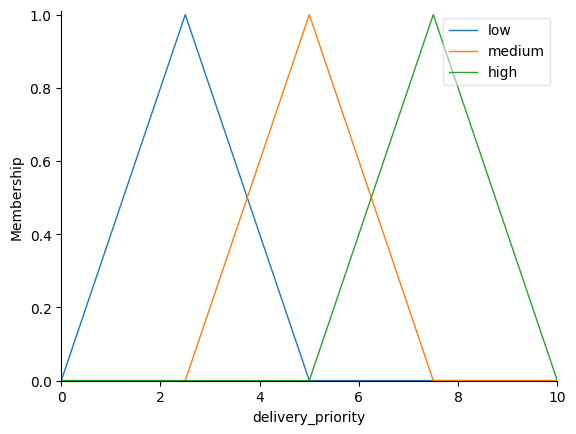

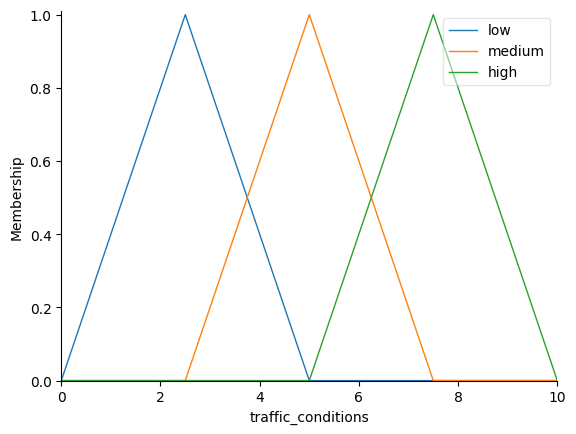

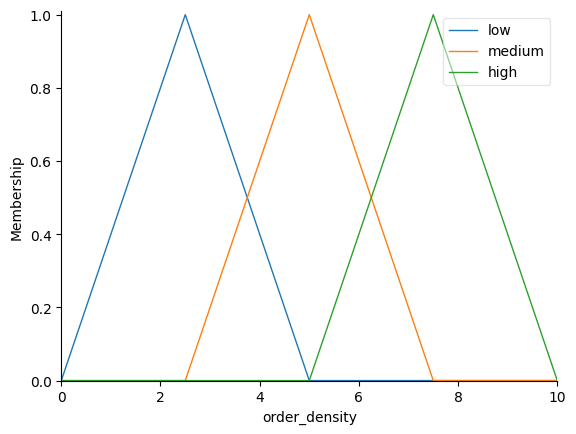

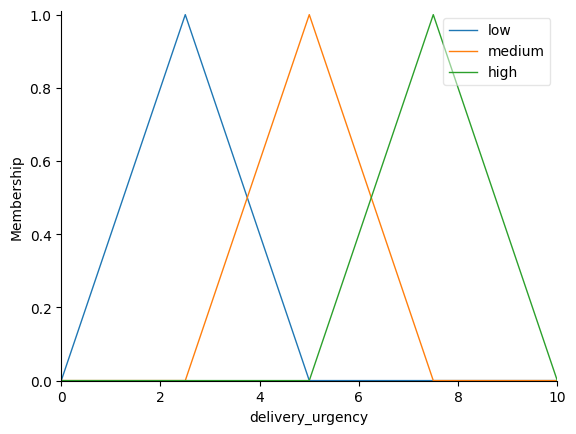

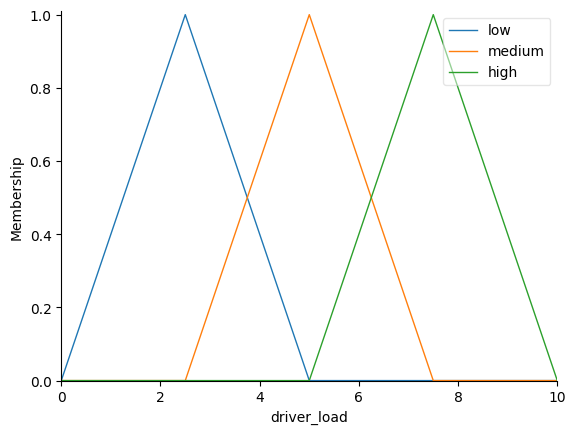

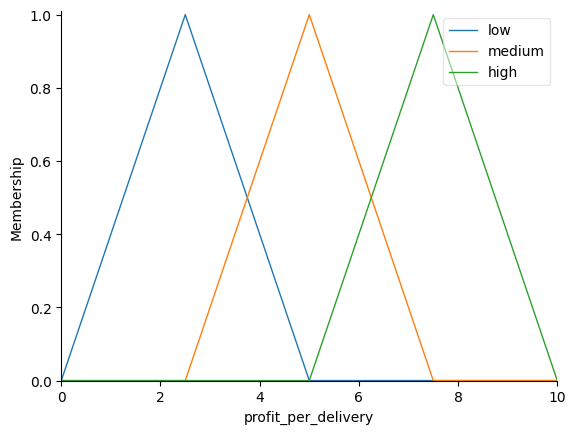

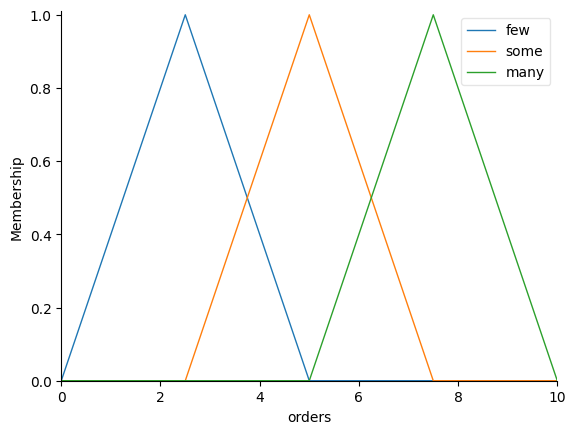

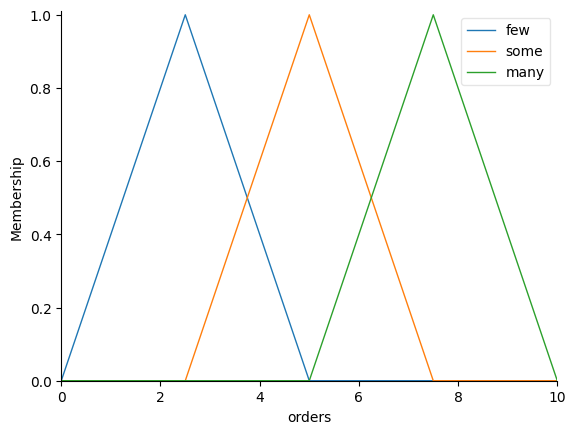

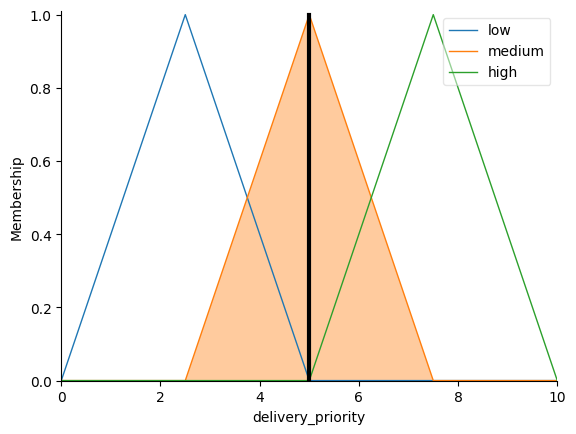

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Khai báo các biến đầu vào
order_density = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'order_density')
delivery_urgency = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'delivery_urgency')
driver_load = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'driver_load')
traffic_conditions = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'traffic_conditions')
profit_per_delivery = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'profit_per_delivery')

# Khai báo các biến đầu ra
orders = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'orders')
delivery_priority = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'delivery_priority')

# Định nghĩa các tập mờ
order_density['low'] = fuzz.trimf(order_density.universe, [0, 2.5, 5])
order_density['medium'] = fuzz.trimf(order_density.universe, [2.5, 5, 7.5])
order_density['high'] = fuzz.trimf(order_density.universe, [5, 7.5, 10])

delivery_urgency['low'] = fuzz.trimf(delivery_urgency.universe, [0, 2.5, 5])
delivery_urgency['medium'] = fuzz.trimf(delivery_urgency.universe, [2.5, 5, 7.5])
delivery_urgency['high'] = fuzz.trimf(delivery_urgency.universe, [5, 7.5, 10])

driver_load['low'] = fuzz.trimf(driver_load.universe, [0, 2.5, 5])
driver_load['medium'] = fuzz.trimf(driver_load.universe, [2.5, 5, 7.5])
driver_load['high'] = fuzz.trimf(driver_load.universe, [5, 7.5, 10])

traffic_conditions['low'] = fuzz.trimf(traffic_conditions.universe, [0, 2.5, 5])
traffic_conditions['medium'] = fuzz.trimf(traffic_conditions.universe, [2.5, 5, 7.5])
traffic_conditions['high'] = fuzz.trimf(traffic_conditions.universe, [5, 7.5, 10])

profit_per_delivery['low'] = fuzz.trimf(profit_per_delivery.universe, [0, 2.5, 5])
profit_per_delivery['medium'] = fuzz.trimf(profit_per_delivery.universe, [2.5, 5, 7.5])
profit_per_delivery['high'] = fuzz.trimf(profit_per_delivery.universe, [5, 7.5, 10])

orders['few'] = fuzz.trimf(orders.universe, [0, 2.5, 5])
orders['some'] = fuzz.trimf(orders.universe, [2.5, 5, 7.5])
orders['many'] = fuzz.trimf(orders.universe, [5, 7.5, 10])

delivery_priority['low'] = fuzz.trimf(delivery_priority.universe, [0, 2.5, 5])
delivery_priority['medium'] = fuzz.trimf(delivery_priority.universe, [2.5, 5, 7.5])
delivery_priority['high'] = fuzz.trimf(delivery_priority.universe, [5, 7.5, 10])

rule1 = ctrl.Rule(order_density['high'] & driver_load['low'] & traffic_conditions['low'], orders['many'])
rule2 = ctrl.Rule(order_density['medium'] & traffic_conditions['high'] & delivery_urgency['medium'], orders['some'])
rule3 = ctrl.Rule(driver_load['high'] & order_density['high'] & profit_per_delivery['medium'], orders['some'])
rule4 = ctrl.Rule(order_density['low'] & delivery_urgency['high'] & traffic_conditions['medium'], orders['some'])
rule5 = ctrl.Rule(profit_per_delivery['high'] & delivery_urgency['high'] & traffic_conditions['high'], orders['some'])
rule6 = ctrl.Rule(delivery_urgency['high'] & profit_per_delivery['high'], delivery_priority['high'])
rule7 = ctrl.Rule(delivery_urgency['medium'] & traffic_conditions['medium'], delivery_priority['medium'])
rule8 = ctrl.Rule(delivery_urgency['low'] & order_density['high'] & profit_per_delivery['low'], delivery_priority['low'])
delivery_priority.view()
traffic_conditions.view()
order_density.view()
delivery_urgency.view()
driver_load.view()
profit_per_delivery.view()
orders.view()
orders_ct = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
order_fuzzy = ctrl.ControlSystemSimulation(orders_ct)

order_fuzzy.input['order_density'] = 10
order_fuzzy.input['delivery_urgency'] = 5
order_fuzzy.input['driver_load'] = 2
order_fuzzy.input['traffic_conditions'] = 5
order_fuzzy.input['profit_per_delivery'] = 4

order_fuzzy.compute()
print(f"Mức độ ưu tiên giao hàng: {order_fuzzy.output['delivery_priority']}")

orders.view(sim=order_fuzzy)
delivery_priority.view(sim=order_fuzzy)
